<a href="https://colab.research.google.com/github/mennaElnemr9/privacy-of-preserving-outliers/blob/main/assignment1-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

**Task 3.1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
!pip install anonymizedf
from anonymizedf.anonymizedf import anonymize
titanic= pd.read_csv("./titanic.csv",index_col=0)
import random
import numpy as np
# print(titanic)
titanic.head(2)
df=pd.DataFrame(titanic)
df1=df.copy()
df2=df.copy()
print(df.columns)
# print(df)
print(df.nunique())
# number of rows
print(df.shape[0])
# Is Age PII?
print("Age min: ",df["Age"].min(), "    Age max: ",df["Age"].max() )
# print("Height min: ",df["Height"].min(), "    Height max: ",df["Height"].max() )
# print("Weight min: ",df["Weight"].min(), "    Weight max: ",df["Weight"].max() )
df1["Age"].fillna(-1,inplace=True)
df2["Age"].fillna(-1,inplace=True)
df["Age"].fillna(-1,inplace=True)
# print(df["Age"].unique())
#Psudo
an = anonymize(df1)
fake_df = (
    an
    .fake_names("Name", chaining=True)
    .show_data_frame()
)
fake_df.drop(columns = ['Name'],inplace=True)
fake_df



Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64
891
Age min:  0.42     Age max:  80.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fake_Name
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Carole Hale
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Jacob Bennett
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Deborah Smith
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Barry Davies
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mrs Abigail Brennan
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Mr Gareth Simmons
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Raymond Brown
889,0,3,female,-1.0,1,2,W./C. 6607,23.4500,NaN,S,Dr Arthur Holmes


In [ ]:
#anonmized data

def shuffle_string(s):
  s=str(s)
  if(s!="nan"):
    l = list(s)
    random.shuffle(l)
    result = ''.join(l)
    lookUpTable[s]=result
    return result
  else:
    return s
#randomization
lookUpTable={}
df['Name'] = df['Name'].apply(lambda s: shuffle_string(s))
df['Ticket'] = df['Ticket'].apply(lambda s: shuffle_string(s))
df['Cabin'] = df['Cabin'].apply(lambda s: shuffle_string(s))
df['Age'] =df['Age'].apply(lambda a: round(a+random.random()))
df
# print(lookUpTable)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,",HderiaMO unBnrrsw ar.",male,23,1,0,1 1/1A275,7.2500,nan,S
2,1,1,"o dn MmeBcTJyeCn,suhe ern rra(ollgr yaiBi.gr )...",female,39,1,0,19CP9 75,71.2833,5C8,C
3,1,3,"iMnai eki.HLse isank,n",female,26,0,0,8N022O3/OT12 S1.,7.9250,nan,S
4,1,1,"P teiu,arlMs teu)M l eaeLercJlhqeFyl.a( H ys",female,35,1,0,130318,53.1000,C123,S
5,0,3,"r.WelmH,ir e lnanlA yilM",male,36,0,0,335047,8.0500,nan,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,",svuRz o aevoMJl.nait",male,28,0,0,125613,13.0000,nan,S
888,1,1,"mgsa. trsd,rGiaE ahheMa Mtri",female,19,0,0,021315,30.0000,B42,S
889,0,3,"ahr,""isssteJ r""e.lonrotnCHe nCihnaeieM",female,-1,1,2,./06C.7W 6,23.4500,nan,S


In [ ]:
# Aggregation
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
df



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,",HderiaMO unBnrrsw ar.",male,19-30,1,0,1 1/1A275,7.2500,nan,S
2,1,1,"o dn MmeBcTJyeCn,suhe ern rra(ollgr yaiBi.gr )...",female,31-45,1,0,19CP9 75,71.2833,5C8,C
3,1,3,"iMnai eki.HLse isank,n",female,19-30,0,0,8N022O3/OT12 S1.,7.9250,nan,S
4,1,1,"P teiu,arlMs teu)M l eaeLercJlhqeFyl.a( H ys",female,31-45,1,0,130318,53.1000,C123,S
5,0,3,"r.WelmH,ir e lnanlA yilM",male,31-45,0,0,335047,8.0500,nan,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,",svuRz o aevoMJl.nait",male,19-30,0,0,125613,13.0000,nan,S
888,1,1,"mgsa. trsd,rGiaE ahheMa Mtri",female,19-30,0,0,021315,30.0000,B42,S
889,0,3,"ahr,""isssteJ r""e.lonrotnCHe nCihnaeieM",female,NaN,1,2,./06C.7W 6,23.4500,nan,S


In [ ]:
#perturbation

def noise(df, column, std = None):
    if std == None:
        std = df[column].std()

    withNoise = df[column].add(np.random.normal(0, std, df.shape[0]))
    copy = df.copy()
    copy[column] = withNoise
    return copy

perturbation_data = noise(df2, 'Age', std=5)
perturbation_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,26.846529,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.719974,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,28.085685,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.770921,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,24.566729,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,25.679283,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,17.669288,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-3.318571,1,2,W./C. 6607,23.4500,NaN,S


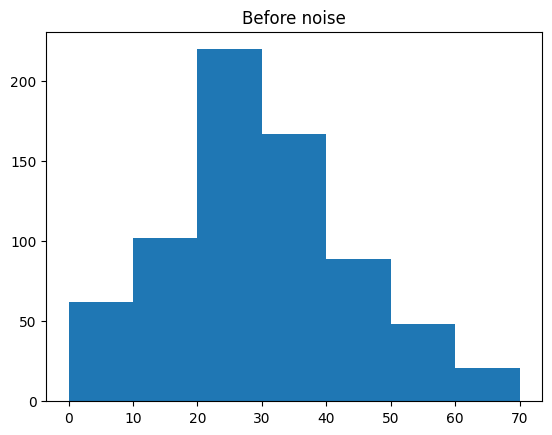

In [ ]:
#plot before and after noise
plt.hist(
    'Age',
    data=df2,
    bins = np.arange(start=0, stop=80, step=10),
)
plt.title("Before noise");


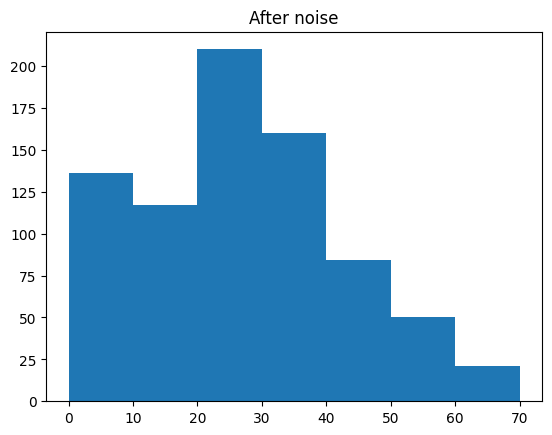

In [ ]:
plt.hist(
    'Age',
    data=perturbation_data,
    bins = np.arange(start=0, stop=80, step=10),
)
plt.title("After noise");

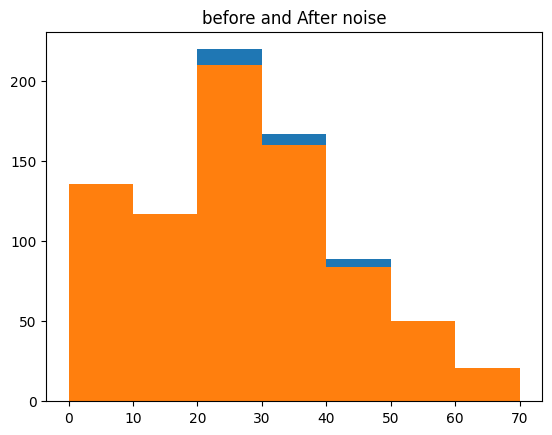

In [ ]:
#before and after on top of each other
plt.hist(
    'Age',
    data=df2,
    bins = np.arange(start=0, stop=80, step=10),
)
plt.hist(
    'Age',
    data=perturbation_data,
    bins = np.arange(start=0, stop=80, step=10),
)
plt.title("before and After noise");

In [ ]:
#calculate data loss
mse = mean_squared_error(df2['Age'], perturbation_data['Age'])/df2['Age'].size

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.0276063732644413
